<a href="https://colab.research.google.com/github/aelshehawy/text-as-data-computational-text-analysis-oxford/blob/main/Code/TextasData_Session3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plan of the Day**

Go over homeworks!

From last time 

- Dictionary Methods
- Counting
- Pandas


New stuff!

- Wordembeddings and Vector Space Representation
- Cosine Similarity
- Clustering
- Topic Modelling


# Dictionary Methods

In [7]:
#we want to start with a single string object - once we write sth we like, we scale up 
s1="Provides for the enforcement of all provisions of law that impose sanctions against countries engaged in gross violations of human rights and that support terrorism against Iraq. Calls on the President to seek multilateral cooperation to: (1) deny dangerous technologies to Iraq; and"
print(s1)

Provides for the enforcement of all provisions of law that impose sanctions against countries engaged in gross violations of human rights and that support terrorism against Iraq. Calls on the President to seek multilateral cooperation to: (1) deny dangerous technologies to Iraq; and


In [8]:
# we define a list of women-related words - we put in Iraq. to make sure the test works (we will drop it later)
female_dict=["woman","women","female","girl","girls","Iraq."]

In [9]:
# empty list for all women-related things mentions
all_women=[]

# we will loop over our femal dict list -> each time, the list comprehension will loop over s1 and add to all_women
# all instances in which that particular word from female dictionary was found.  
# Note that .extend takes the elements 
# of a new list and adds them to an existing list as individual elements, not as new list-element (producing nested lists)
# as .append would - experiment with .append! 

for word in female_dict:
    all_women.extend([x for x in s1.split() if x==word])

In [10]:
print("I found ", len(all_women), "cases of women mentioned: ", all_women)

I found  1 cases of women mentioned:  ['Iraq.']


In [11]:
# now that we know this sort of works, let's fine-tune, specifically, let's clean up and lower text
# I will not throw out stop words since for this example I do not care that text contains them

# remember you need regular expressions loaded for some of the commands!

import re

def clean_sanctions(sometextasargument):
    # note that whatever we pass to function as argument when invoked will become assigned to object sometextasargument, 
    # will then be assigned to object text which will keep changing until we assign it to object sometextasoutput
    text=sometextasargument.replace('\n\n','')
    text=text.lower()
    text= re.sub('[^A-Za-z0-9]+', ' ', text)
    text=re.sub(r'[0-9]+', " ", text)     
    sometextasoutput=text
    # finally, we ask the function returns what it did:  
    return (sometextasoutput)

In [ ]:
# let's check what fn returns by passing to it the string object s1
# a remark on the function - I could have used "text" throughout so no "sometextasargument", "sometextasoutput"
# to the same effect - make sure you see that this works too
# note that unless you tell the fn what you want returned, it will perform the things you said and return...nothing! so "return!"

In [ ]:
print(clean_sanctions(s1))

In [12]:
# note that now I should specify my dictionary list again so that it contains only lower case words with no punctuation:

female_dict=["woman","women","female","girl","girls","iraq"]

all_women=[]

# note also that now I split the output of the function, clean_sanctions(s1), and not the original string s1!

for word in female_dict:
    all_women.extend([x for x in clean_sanctions(s1).split() if x==word])
print("I found ", len(all_women), "cases of women mentioned: ", all_women)

#you will notice that now I find more - because I cleaned up the text beforehand

I found  2 cases of women mentioned:  ['iraq', 'iraq']


In [13]:
import csv

tsv_file = open("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/sascat_excerpt.tsv")
read_tsv = csv.reader(tsv_file, delimiter="\t")
all_lines=[]
for line in read_tsv:
    print(line)
    all_lines.append(line)
tsv_file.close() # we see here each row is now saved as a list, in a list: all_lines

['id-snippet', 'n-sentences', 'n-words', 'n-nouns', 'n-adj', 'n-verbs', 'n-entities', 'n-vague', 'n-concrete', 'n-conditionals', '']
['hr5114-101.1', '20', '839', '441', '83', '87', '76', '3', '4', '5', "Provides for the enforcement of all provisions of law that impose sanctions against countries engaged in gross violations of human rights and that support terrorism against Iraq. Calls on the President to seek multilateral cooperation to: (1) deny dangerous technologies to Iraq; and (2) induce Iraq to respect internationally recognized human rights and to allow international humanitarian and human rights organizations to have access to Iraq and Kuwait. Prohibits, as part of the sanctions against Iraq: (1) any sales to Iraq under the Arms Export Control Act; (2) the issuance of licenses for the export to Iraq of items on the U.S. Munitions List; (3) exports to Iraq of certain goods or technology listed under the Export Administration Act of 1979; (4) the issuance of licenses of authoriz

In [ ]:
len(all_lines)

In [14]:
#let's look at where text is, row 2, cell 11:

all_lines[1][10]

"Provides for the enforcement of all provisions of law that impose sanctions against countries engaged in gross violations of human rights and that support terrorism against Iraq. Calls on the President to seek multilateral cooperation to: (1) deny dangerous technologies to Iraq; and (2) induce Iraq to respect internationally recognized human rights and to allow international humanitarian and human rights organizations to have access to Iraq and Kuwait. Prohibits, as part of the sanctions against Iraq: (1) any sales to Iraq under the Arms Export Control Act; (2) the issuance of licenses for the export to Iraq of items on the U.S. Munitions List; (3) exports to Iraq of certain goods or technology listed under the Export Administration Act of 1979; (4) the issuance of licenses of authorizations under the Atomic Energy Act of 1954 for the export to Iraq of nuclear materials, facilities, and technology; (5) U.S. support for loans or financial or technical assistance to Iraq by internationa

In [15]:
all_lines[0][10]# we do not need top row - it has datanames (after pop, all_lines[0][10] will produce text above, formerly all_lines[1][10])
all_lines.pop(0)
all_lines

[['hr5114-101.1',
  '20',
  '839',
  '441',
  '83',
  '87',
  '76',
  '3',
  '4',
  '5',
  "Provides for the enforcement of all provisions of law that impose sanctions against countries engaged in gross violations of human rights and that support terrorism against Iraq. Calls on the President to seek multilateral cooperation to: (1) deny dangerous technologies to Iraq; and (2) induce Iraq to respect internationally recognized human rights and to allow international humanitarian and human rights organizations to have access to Iraq and Kuwait. Prohibits, as part of the sanctions against Iraq: (1) any sales to Iraq under the Arms Export Control Act; (2) the issuance of licenses for the export to Iraq of items on the U.S. Munitions List; (3) exports to Iraq of certain goods or technology listed under the Export Administration Act of 1979; (4) the issuance of licenses of authorizations under the Atomic Energy Act of 1954 for the export to Iraq of nuclear materials, facilities, and technolo

In [ ]:
#and note that what I want returned is a string of the number of times mentioned and the list with mentions

def women_mentions(argument):
    female_dict=["woman","women","female","girl","girls","iraq"]
    all_women=[]
    for word in female_dict:
        all_women.extend([y for y in clean_sanctions(argument).split() if y==word])
    return (str(len(all_women)),all_women)

In [16]:
#good to check
print(women_mentions(all_lines[0][10]))

('29', ['iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq', 'iraq'])


In [ ]:
f1 = open("sascat_women.txt","w",encoding="utf8")

# remember all_lines is the big list and now x will be the nested list (row) on each iteration
# we need to save: id-snippet identifier, and the product of the search for women in 11th column

for x in all_lines:
    f1.write(x[0]+"\t"+str(women_mentions(x[10]))+"\n")

f1.close()

# Pandas


![pandas1](https://media.giphy.com/media/Wa5JDuv6kzoTC/giphy.gif)


## Why is Pandas AMAZING?

1. super easy loading in data
2. easy data cleaning
3. easy data manipulation
4. easy merging and extraction


### Lets learn to load data in pandas

We are going to start with German Sputnik Newspaper articles

**Lets open the dataset from earlier using Python's open function**

In [ ]:
import pandas as pd
with open('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/sputnikgerman20.tsv','r') as tsv:
    data = [line.strip().split('\t') for line in tsv]
    
data

In [ ]:
#get the date
data_dates = [el[2] for el in data]


In [ ]:
data_dates

**Lets try with pandas**

In [ ]:
sputnikdata1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/sputnikgerman20.tsv')

#why do we get an error message?

In [ ]:
sputnikdata1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/sputnikgerman20.tsv',sep='\t')
sputnikdata1.head()
#what do we want to change here

In [ ]:
sputnikdata = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/sputnikgerman20.tsv',sep='\t', header=None)
sputnikdata

## Select Column

### how would I select the date?

In [ ]:
sputnikdata_date=sputnikdata[2]
sputnikdata_date

### Select only content and title


In [ ]:
sputnikdata_content_title=sputnikdata[[3,4]]
sputnikdata_content_title

## Select rows

In [ ]:
#select 0-5

sputnikdata_rows=sputnikdata[0:6]
sputnikdata_rows

In [ ]:
sputnikdata_content_title=sputnikdata[[3,4]]
sputnikdata_content_title

In [ ]:
sputnikdata_content_title=sputnikdata[[3,4]]
sputnikdata_content_title

In [ ]:
sputnikdata_date=sputnikdata[2]
sputnikdata_date

In [ ]:
sputnikdata_content_title=sputnikdata[[3,4]]
sputnikdata_content_title

## Clean Data

1. lowercase
2. remove numbers 
3. remove punctuation
3. remove stopwords

In [ ]:
sputnikdata.head()

In [ ]:
#remove not needed columns
sputnikdata2 = sputnikdata.drop(sputnikdata.columns[[0, 1,4, 5,6,7,8]], axis=1)  # df.columns is zero-based pd.Index 
sputnikdata3=sputnikdata2
sputnikdata3

In [ ]:
#lowercase
sputnikdata3["lowercased"]=sputnikdata3[3].str.lower()
sputnikdata3

In [ ]:
## remove punctuation
sputnikdata3["nopunct"] = sputnikdata3['lowercased'].str.replace('[^\w\s]','')


In [ ]:
sputnikdata3.head()

In [ ]:
#remove numbers

sputnikdata3['nonumb'] = sputnikdata3['nopunct'].str.replace('\d+', '')


In [ ]:
sputnikdata3.head()

In [ ]:
#remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('german')

In [ ]:
sputnikdata3['without_stopwords'] = sputnikdata3['nonumb'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
sputnikdata3

In [ ]:
#all on one step

import string
exclude = set(string.punctuation) # if you see this not part of the punctuation -->”
import nltk
nltk.download('stopwords') #you can also download all libraries in nltk at once
from nltk.corpus import stopwords
stop_word_list = stopwords.words('english')


def nlp_simple_pipeline(text):
    
    #it depends if the words have been lowercased or not
    text = text.lower()
    
    text = nltk.word_tokenize(text)
        
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    text = [token for token in text if token not in stop_word_list]

    return text

sputnikdata2["cleanedtext"]=sputnikdata2[3].apply(clean_sanctions) 
   

In [ ]:
sputnikdata2

## Visualize counts 

In [ ]:
#power of visualization 
from collections import Counter
counts= Counter(" ".join(sputnikdata2["without_stopwords"]).split()).most_common(10)
counts

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

pd.DataFrame(counts, columns=['lbl','val']).set_index('lbl').plot(kind='bar');


In [ ]:
#without removing stopwords
pd.Series(' '.join(sputnikdata2[3]).lower().split()).value_counts()[:10]
#what happened here

## Exporting data


In [ ]:
sputnikdata2.to_csv("mydata.csv", sep='\t', encoding='utf-8')

# More on Counting

In [ ]:
sascat_ccounts = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/datacounting_visualization.tsv',delimiter="\t")
del sascat_ccounts['Unnamed: 0']


- itertools is a function creating efficient loops, read more here https://docs.python.org/2/library/itertools.html and here https://realpython.com/python-itertools/

- chains from itertools: chain('ABC', 'DEF') --> A B C D E F - This function takes any number of iterables as arguments and “chains” them together.


In [ ]:
country_notflat = [a.split() for a in sascat_ccounts['mentions_countries']] 
#this command puts countries in a list of list according to thei structure in pandas
country_notflat

In [ ]:
import itertools
from itertools import chain

counter = Counter(chain.from_iterable(country_notflat))
counter

In [ ]:
#sort by values
from collections import OrderedDict
d_sorted_by_value = OrderedDict(sorted(counter.items(), key=lambda x: x[1]))
d_sorted_by_value

In [ ]:
plt.bar(d_sorted_by_value.keys(), d_sorted_by_value.values(), color='r')
plt.gcf().set_size_inches(20, 10)
plt.xticks(rotation=90)
plt.show()

# Word Relatedness and Embeddings

In [ ]:
# Load needed libraries for today

import codecs, nltk, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

### How do we know if words are related?

Similarity: two words sharing a high number of salient (e.g., synonyms) <br>
Relatedness: two words semantically associated, without being necessarily similar (car and pilot)

### Why do we need embeddings?

- We cant just rely on word counts
- To capture the meaning of a word in the vector-space
- words with similar context occupy close spatial positions

## Vector Space Model

The most basic method for transforming words into vectors is to count occurrence of each word in each document - **countvectorizing or one-hot encoding **


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# create CountVectorizer object
vectorizer = CountVectorizer()
corpus = [
          'Text of first document.',
          'Text of the second document made longer.',
          'Number three.',
          'This is number four.',
]

# learn the vocabulary and store CountVectorizer sparse matrix in X
X = vectorizer.fit_transform(corpus)

# columns of X correspond to the result of this method
vectorizer.get_feature_names() == (
    ['document', 'first', 'four', 'is', 'longer',
     'made', 'number', 'of', 'second', 'text',
     'the', 'this', 'three'])
# retrieving the matrix in the numpy form
X.toarray()


# transforming a new document according to learn vocabulary
#vectorizer.transform(['A new document.']).toarray()


- The idea is to collect a set of documents (they can be words, sentences, paragraphs or even articles) and count the occurrence of every word in them. 
- Strictly speaking, the columns of the resulting matrix are words and the rows are documents.

**This is a however sparse vector** - has mostly zero values

In [ ]:
X = vectorizer.fit_transform(corpus)
X#make list of aall sentenced 

In [ ]:
vectorizer.get_feature_names()

In [ ]:
X

In [ ]:
X.toarray()

## Wordembeddings

- Lower dimension dense vectors

Word2vec - Train the neural network for two different tasks:
- Predicting the word, given the context
- Classification of a word, given another word in the sentence

**How do they help us?**

- Identify similarities between words
- By checking words in the vector space, word-embedding models can check analogies


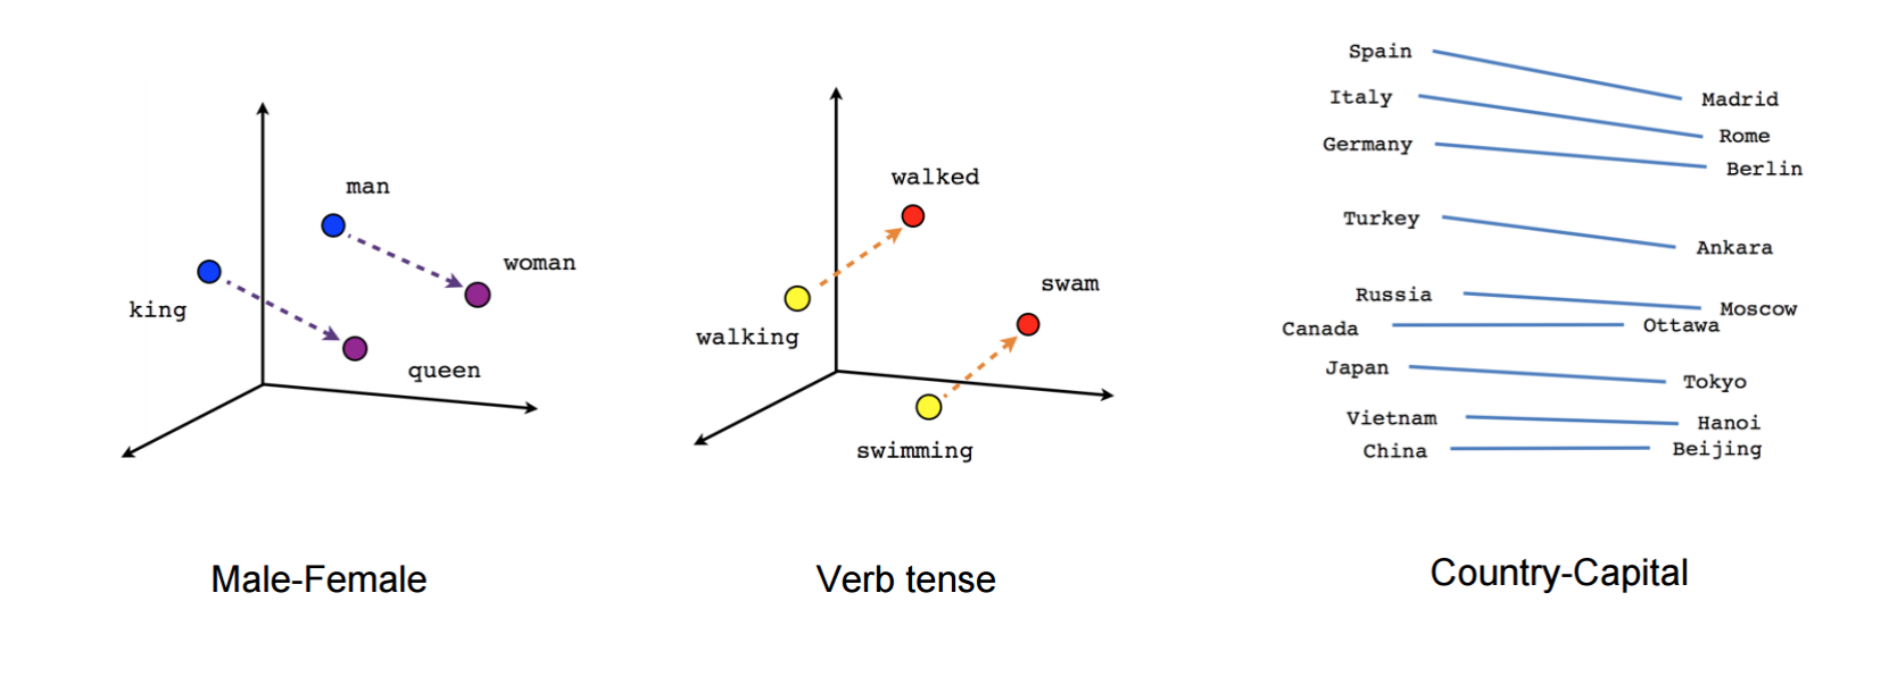

Check this link out!
https://anvaka.github.io/pm/#/galaxy/word2vec-wiki?cx=-3284&cy=-7937&cz=3838&lx=-0.1558&ly=0.8739&lz=0.3926&lw=0.2406&ml=300&s=1.75&l=1&v=d50_clean

## You can train your own embeddings: for example on political text, manifestos etc.

## Lets see how we can use them!

In [ ]:
import gensim
# the model is organized like this: word = embeddings
small_model = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/small-embeddings.txt', binary=False)

In [ ]:
#to see the embeddings of a word, you just do:

print (small_model["clinton"])
print (small_model["obama"])

In [ ]:
small_model.wv.most_similar(positive=['obama'])


In [ ]:
# get relatedness

print (small_model.wv.similarity('clinton', 'clinton'))
print (small_model.wv.similarity('clinton', 'obama'))

In [ ]:
import nltk
nltk.download("punkt")
# you can represent the meaning of an article, by the average of their embeddings
# let's compute the embeddings for an article

dataset = codecs.open("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/rt_dataset_small", "r", "utf-8").read().strip().split("\n")

article = dataset[4].split("\t")[3]

cleaned_article = nlp_simple_pipeline(article)
print (cleaned_article)

In [ ]:
# for each word, load embeddings
for word in cleaned_article:
    print (word)
    embed_word = small_model[word]

In [ ]:
# handling exceptions
for word in cleaned_article:
    try:
        embed_word = small_model[word]
    except KeyError:
        print (word)
        continue

## Representing the meaning of an article as a single embedding


In [ ]:
small_model

In [ ]:
import numpy as np

def article_embedding(cleaned_article):
    
    article_embedd = []
    # for each word in the article, you take the embeddings
    for word in cleaned_article:
        try:
            embed_word = small_model[word]
            article_embedd.append(embed_word)
        except KeyError:
            continue
    
    # average vectors of all words
    avg = [float(sum(col))/len(col) for col in zip(*article_embedd)]
    avg = np.array(avg).reshape(1, -1)
    return avg

In [ ]:
article = dataset[1]
cleaned_article = nlp_simple_pipeline(article)
embed_art = article_embedding(cleaned_article)

In [ ]:
embed_art

# Cosine-similarity

- Cosine similarity calculates similarity by measuring the cosine of angle between two vectors in a multi-dimensional space.
- The smaller the angle the higher the cosine similarity
- scikit learn library

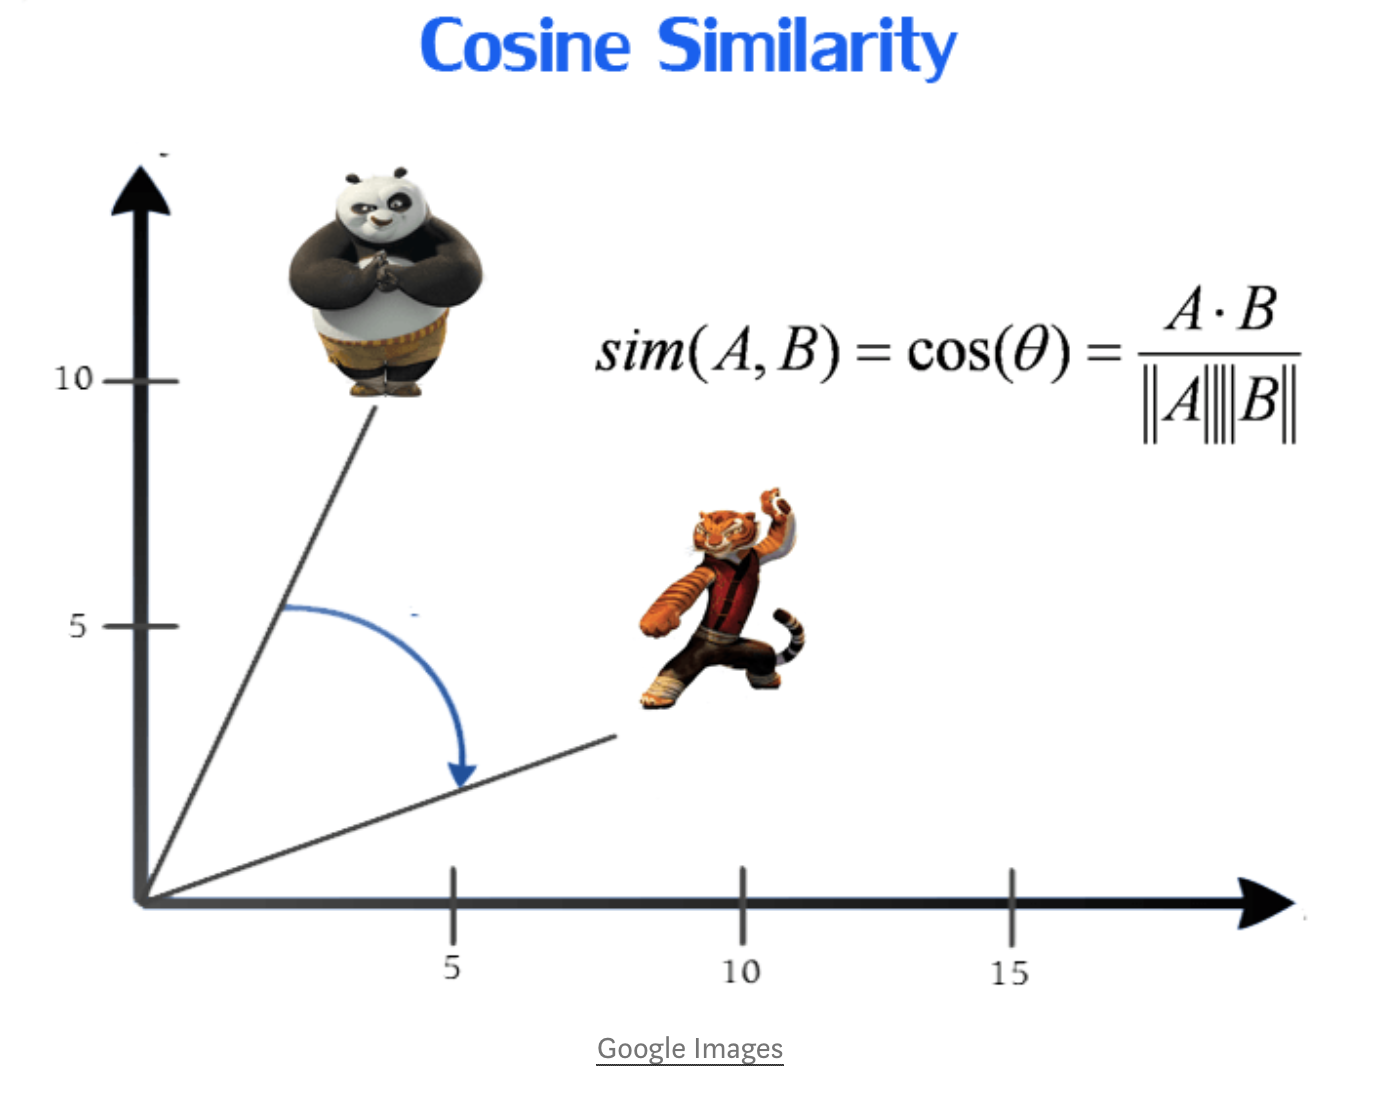

Google Images used by Dhruvil Karani in his Medium article

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#image = mpimg.imread("/Users/Ashrakat/Desktop/cosines.png")
#plt.imshow(image)
#plt.gcf().set_size_inches(15, 10)
#plt.show()

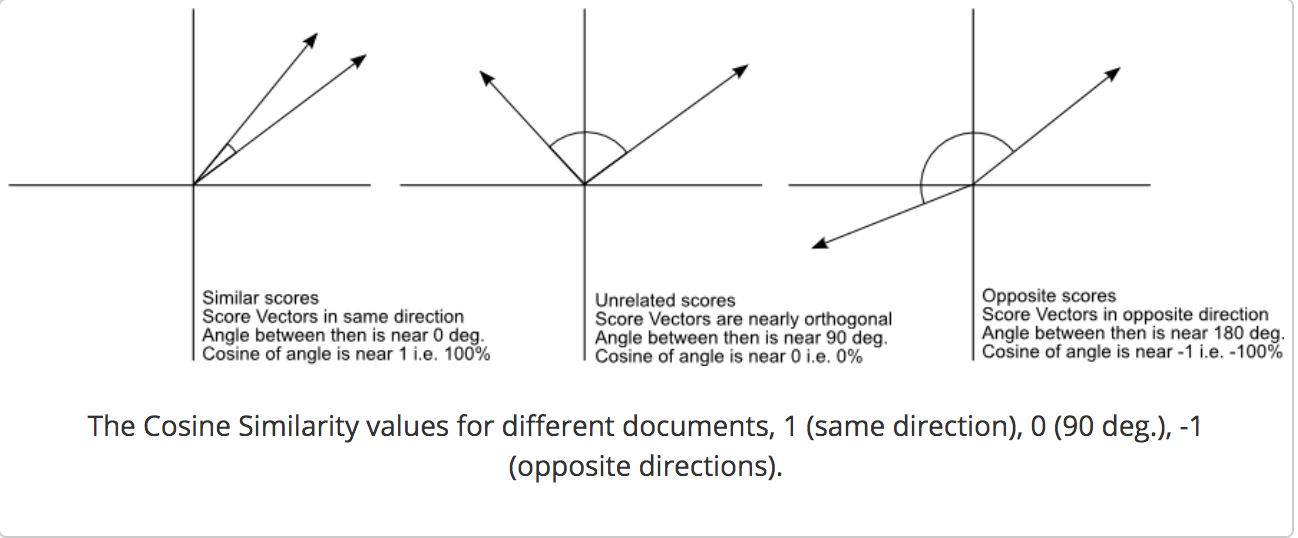

Source: http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/

In [ ]:
def nlp_simple_pipeline(text):
    
    #it depends if the words have been lowercased or not
    text = text.lower()
    
    text = nltk.word_tokenize(text)
        
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    text = [token for token in text if token not in stop_word_list]

    return text


def article_embedding(cleaned_article):
    
    article_embedd = []
    # for each word in the article, you take the embeddings
    for word in cleaned_article:
        try:
            embed_word = small_model[word]
            article_embedd.append(embed_word)
        except KeyError as e:
            print (e,word)
            continue
    
    # average vectors of all words
    avg = [float(sum(col))/len(col) for col in zip(*article_embedd)]
    avg = np.array(avg).reshape(1, -1)
    return avg

In [ ]:
Document_A="The sun is shining today I want to go out"
Document_B= "What a beautiful summer day."
Document_C= "The winter is coming"
Document_D= "It is snowing over here"


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

doc_a=nlp_simple_pipeline(Document_A)
doc_b=nlp_simple_pipeline(Document_B)
doc_c=nlp_simple_pipeline(Document_C)
doc_d=nlp_simple_pipeline(Document_D)

doc_a=article_embedding(doc_a)
doc_b=article_embedding(doc_b)
doc_c=article_embedding(doc_c)
doc_d=article_embedding(doc_d)




In [ ]:
print("compare a and b",cosine_similarity(doc_a, doc_b))
print("compare a and c",cosine_similarity(doc_a, doc_c))
print("compare c and d",cosine_similarity(doc_c, doc_d))


In [ ]:
#define that you need to exclude punctuation
exclude = set(string.punctuation)

# this represent any text as a single "doc-embedding" we use it both for the query and the sentences
# input should be a string
def text_embedding(text):
    
    #this works to lower text
    text = text.lower()
    
    # we tokenize the text in single words
    text = nltk.tokenize.WordPunctTokenizer().tokenize(text)
    
    # we remove numbers and punctuation
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    doc_embed = []
    
    # for each word we get the embedding and we append it to a list
    for word in text:
            try:
                embed_word = small_model[word]
                doc_embed.append(embed_word)
            except KeyError as e: # if there is an error we continue
                print (e,word)
                continue
    # we average the embeddings of all the words, getting an overall doc embedding
    if len(doc_embed)>0:
        avg = [float(sum(col))/len(col) for col in zip(*doc_embed)]

        avg = np.array(avg).reshape(1, -1)

        # the output is a doc-embedding
        return avg
    else:
        return "Empty"

In [ ]:
text_query = ["crime","criminal","murder","drugs","rape"]

#query = [" ".join(nlp_pipeline(" ".join(text_query)))]

emb_query = nlp_simple_pipeline(" ".join(text_query))
emb_query = article_embedding(" ".join(text_query))

emb_query

In [ ]:
import csv

tsv_file = open("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/rt_dataset_small")
read_tsv = csv.reader(tsv_file, delimiter="\t")
all_lines=[]
for line in read_tsv:
    print(line)
    all_lines.append(line)
tsv_file.close()

In [ ]:
all_lines=all_lines[1:101]
len(all_lines)

In [ ]:
all_lines

In [ ]:
embs_corpus = [x+[text_embedding(x[3])] for x in all_lines] #what is x

In [ ]:
embs_corpus

In [ ]:
import codecs, nltk, string, os, gensim
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

scores = [x + [cosine_similarity(x[4], emb_query)[0]] for x in embs_corpus]
scores

In [ ]:
#inspired by fede

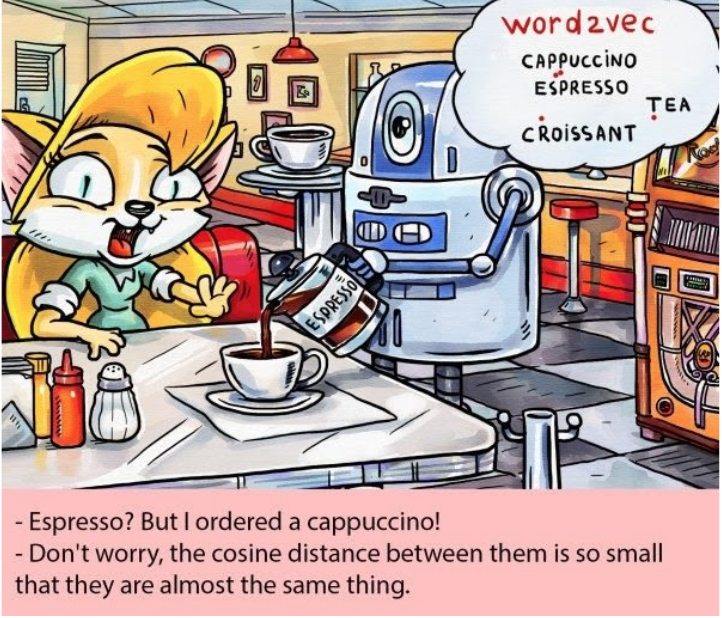

# Unsupervised Techniques: Clustering and Topic Models

In [ ]:
import codecs, nltk, string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import gensim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

exclude = set(string.punctuation)
stop_word_list = stopwords.words('english')

# input should be a string
def text_embedding(text):
    
    #it depends if the words have been lowercased or not
    text = text.lower()
    
    text = nltk.word_tokenize(text)
        
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    text = [token for token in text if token not in stop_word_list]

    article_embedd = []
    
    for word in text:
            try:
                embed_word = small_model[word]
                article_embedd.append(embed_word)
            except KeyError:
                continue

    avg = [float(sum(col))/len(col) for col in zip(*article_embedd)]
    
    # the output is a doc-embedding
    return avg


# input should be a string
def nlp_pipeline(text):
    
    # if you want you can split in sentences - i'm usually skipping this step
    # text = nltk.sent_tokenize(text) 
    
    #tokenize words for each sentence
    text = nltk.word_tokenize(text)
    
    # pos tagger
    text = nltk.pos_tag(text)

    # lemmatizer
    text = [wordnet_lemmatizer.lemmatize(token.lower(),"v")if "V" in pos else wordnet_lemmatizer.lemmatize(token.lower()) for token,pos in text]
    
    # remove punctuation and numbers
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    # remove stopwords - be careful with this step    
    text = [token for token in text if token not in stop_word_list]
    
    text = " ".join(text)
    
    # the output is text
    return text

In [ ]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

#from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

#define function to display scappterplot
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

In [ ]:
display_pca_scatterplot(small_model, 
                        ['coffee', 'tea', 'beer', 'wine', 'brandy', 'rum', 'champagne', 'water',
                         'spaghetti', 'borscht', 'hamburger', 'pizza', 'falafel', 'sushi', 'meatballs',
                         'dog', 'horse', 'cat', 'monkey', 'parrot', 'koala', 'lizard',
                         'frog', 'toad', 'monkey', 'ape', 'kangaroo', 'wombat', 'wolf',
                         'france', 'germany', 'hungary', 'luxembourg', 'australia', 'fiji', 'china',
                         'homework', 'assignment', 'problem', 'exam', 'test', 'class',
                         'school', 'college', 'university', 'institute'])

In [ ]:
display_pca_scatterplot(small_model, sample=300)


In [ ]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

# Clustering (k-means)

 - Unsupervised learning method 
 - partition n observations (i.e., documents) into k clusters 
 - in which each observation belongs to the cluster with the nearest mean.


### What is a cluser

-  Cluster refers to a collection of data points aggregated together because of certain similarities.

### How does k-means work?

- Assigning subgroups in your data - see to which subgroup your data belings
- You assign a target number k which will refer to the number of centroid needed in the dataset
- A centroid will be the real location of the center of a cluster
- Data points is allocated to each of the clusters through reducing the in-cluster sum of squares. 

### What could be issues?

- Very coarse-grained (1 doc - 1 cluster)
- Numbers of clusters have to be assigned in advance
- Difficult to evaluate


### Example with random data

In [ ]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

# create blobs - helps us generate data samples or datasets
# you can also use instead the np.random.rand to create random samples
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

# create np array for data points
points = data[0]

# create scatter plot
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='viridis')
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.gcf().set_size_inches(7, 7)
plt.show()

## k-means

In [ ]:
from sklearn.cluster import KMeans 


X,y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)


kmeans = KMeans(n_clusters=4) 
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)
plt.show()

## let's try to cluster articles


In [ ]:
# i'm re-loading everything here, because I want to use the titles of the articles to interpret the clusters
dataset = codecs.open("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/rt_dataset_small", "r", "utf-8").read().strip().split("\n")

article = dataset[4].split("\t")

corpus = []
titles =  []

# you can run wit all data at home
for line in dataset[1:1000]:
    # to better understands which clusters are created, let's check the titles of the articles
    title = line.split("\t")[1]
    text = line.split("\t")[3]
    text = text_embedding(text)
    
    if len(text)>0:
        corpus.append(text)
        titles.append(title)
print ("ready!")

In [ ]:
from sklearn.cluster import KMeans

# usual thing, np arrays
X = np.array(corpus)
y = np.array(titles) 

# we define kmeans, with 10 clusters (you can change this number and see how the results change)
# then we train it using only the documents
kmeans = KMeans(n_clusters=10).fit(X)

In [ ]:
X

In [ ]:
y

In [ ]:
# these are the labels we obtain
kmeans.labels_

In [ ]:
# to see which docs are in which clusters, we need to loop over all labels

# so the number of clusters
for i in range(10):
    # print the title of the document if the doc is in this cluster
    print ("this is cluster number",i)
    # then you loop over all titles
    for k in range(len(titles)):
        
        # this is the title
        title = titles[k]
        
        #this is its cluster label
        label = kmeans.labels_[k]
        
        # does it belong to this cluster?
        if i == label:
            #if yes, then print it out!
            print (title)
    print (" ")

In [ ]:
 #let's count which are the most popular words in the titles of each cluster
from collections import Counter
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')



for i in range(10):
    
    # we create a list where we put the words from the titles
    title_words = []
    
    print ("this is cluster number",i)
    for k in range(len(titles)):
        # we clean the title with our pipeline
        title = nlp_pipeline(titles[k]).split(" ")
        label = kmeans.labels_[k]
        if i == label:
            # we put each word in the list
            for word in title:
                title_words.append(word)
    
    # then we count and print the 10 most common
    most_common = Counter(title_words).most_common(10)
    print (most_common)
    print (" ")

In [ ]:
X

### For all of my mean girls fans out there! 

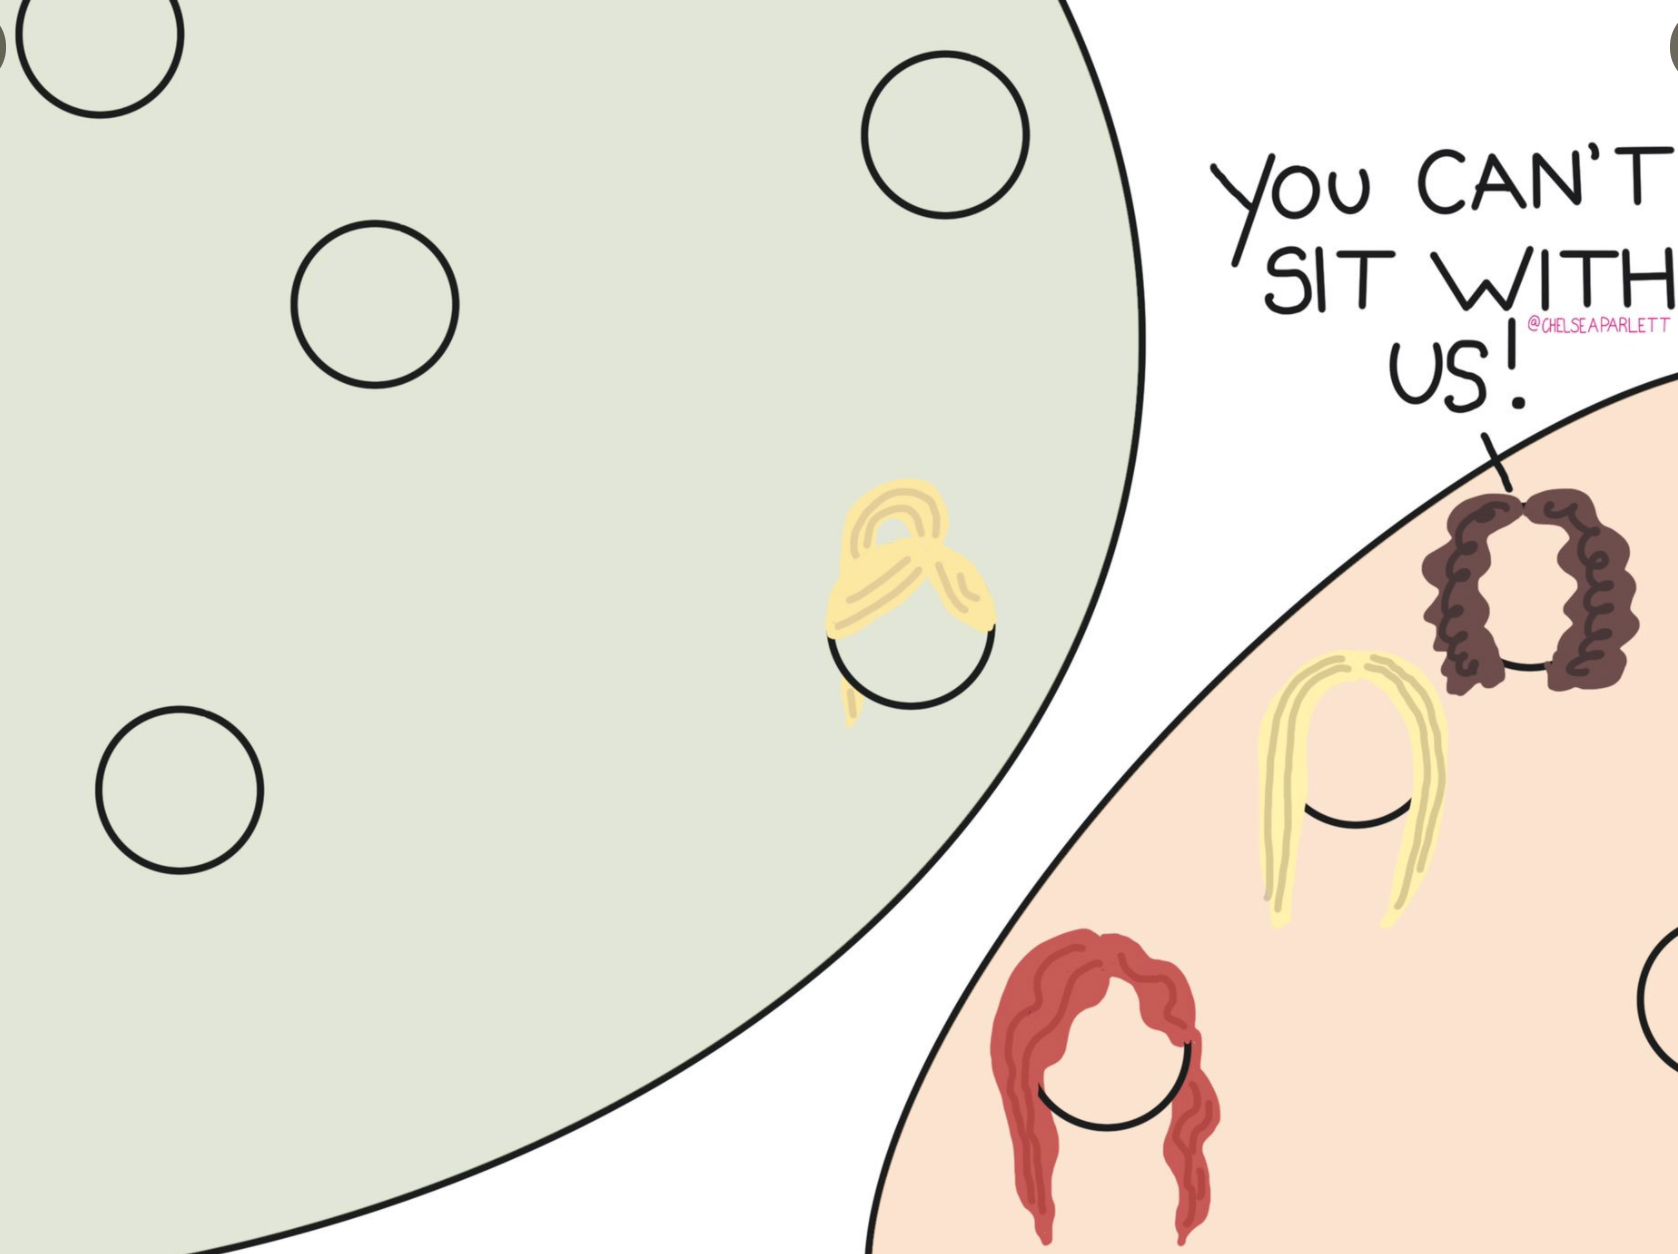

# Topic Modelling

### Instead of assigning each document to a single cluster
### The goal is to identify the underlying topics of each document and group them consequently.

- In k-means clustering, each observation—for our purposes, each document—can be assigned to one, and only one, cluster. 
- Topic models, however, are mixture models. This means that each document is assigned a probability of belonging to a latent theme or “topic.” 



(Chris Bail’s Duke SICC)



### What are these topics?

- Groups of tokens that are likely to appear in the same context 
- Topics explain co-occurrences of words in documents with sets of semantically related words, called topics. 
- A hidden structure that determines how tokens appear in the corpus

### Latent Dirichlet Allocation (Gibbs sampling)

**Determine the probability that each document is associated with a given theme or topic.**

**The distribution of topics in documents and distribution of words in topics have a Dirichlet prior **


1. Inizialize topic assignments randomly (choose k topics, very difficult and consequential decision)
  * Words are assigned randomly to opics
  
2. For each iteration
 * For each document
 * For each word re-assign topic to word, given:
 
    - all other words in the doc and their topic-assignment (dirichlet prior) - prevelance of word in a doc
    - all other occurrences of the same word in other docs (dirichlet prior)


## Outputs:

1. Words - associated with the k topics
2. Documents - associated with k topics

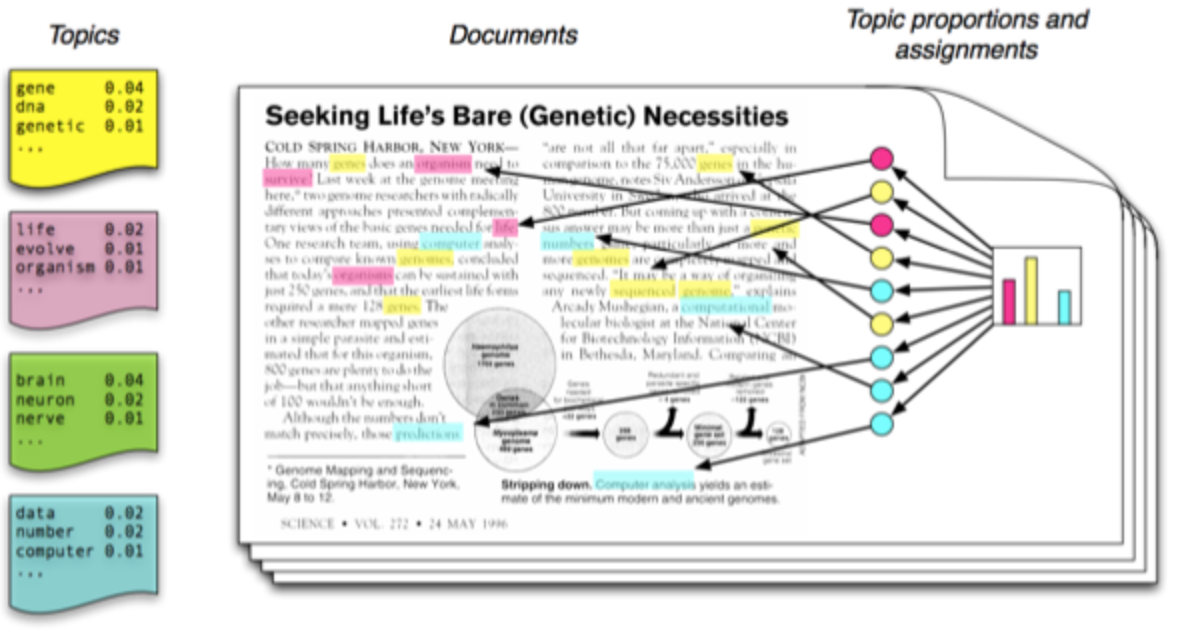 

Source: Blei, David M. "Probabilistic topic models." Communications of the ACM 55.4 (2012): 77-84.

## Use carefully!

- sometimes unituitive
- hard to interpret often
- "making educated guesses about how words cohere into different latent themes by identifying patterns in the way they co-occur within documents." - Chris Bail

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()

exclude = set(string.punctuation)
stop_word_list = stopwords.words('english')

# input should be a string
def nlp_pipeline(text):
    
    # if you want you can split in sentences - i'm usually skipping this step
    # text = nltk.sent_tokenize(text) 
    
    #tokenize words for each sentence
    text = nltk.word_tokenize(text)
    
    # pos tagger
    text = nltk.pos_tag(text)

    # lemmatizer
    text = [wordnet_lemmatizer.lemmatize(token.lower(),"v")if "V" in pos else wordnet_lemmatizer.lemmatize(token.lower()) for token,pos in text]
    
    # remove punctuation and numbers
    text = [token for token in text if token not in exclude and token.isalpha()]
    
    # remove stopwords - be careful with this step    
    text = [token for token in text if token not in stop_word_list]
        
    # the output is text
    return text

In [ ]:
#topic models, finally!

import codecs, os


content = []
doc = open("/content/drive/MyDrive/Colab Notebooks/Oxford Text Analysis/Data/sascat_excerpt.tsv","r").read().strip().split("\n")
for line in doc[2:]:
            sent = line.split("\t")[10]
            sent = nlp_pipeline(sent)
            if len(sent)>1:
                content.append(sent)


In [ ]:
content

In [ ]:
from gensim import corpora, models

# for running LDA in gensim we need a dictionary of all the words
dictionary = corpora.Dictionary(content)

# and to count the word frequency in each doc
X = [dictionary.doc2bow(text) for text in content]

print ("ready!")

In [ ]:
ldamodel = models.ldamodel.LdaModel(X, num_topics=10, id2word = dictionary, iterations=500)
print ("done!")

In [ ]:
for topic in ldamodel.print_topics(num_words=7):
    print (topic)

In [ ]:
!pip install pyLDAvis==2.1.2


In [ ]:
import pyLDAvis
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, X,dictionary)
vis

#saliency = term_proportion * distinctiveness


- Each bubble is a topic. 
- The larger the bubble, the higher percentage of the number of tokens in the corpus is about that topic.
- Blue bars:  overall frequency of each word in the corpus.
- Red bars: # of times a given term was generated by a given topic

Source:https://neptune.ai/blog/pyldavis-topic-modelling-exploration-tool-that-every-nlp-data-scientist-should-know  **Read more at this link**


### Take a look at what **Structural Topic Models** are: they employ meta data about the document to improve the assignmnet to topics